# <span style="color:purple">01_Cartopy_Introduction</span>

## In this notebook, we'll cover the following:
1. Extend Matplotlib's `axes` into georeferenced `GeoAxes`
2. Create a map with a specified projection and add various cartographic features to it.
3. Explore some of Cartopy's map projections
4. Create regional maps

### References:  
1. [Cartopy Documentation](https://scitools.org.uk/cartopy/docs/latest/)
2. [*Maps with Cartopy*(Ryan Abernathey)](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)

## <span style="color:purple">0) Preliminaries</span>

In [1]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

## <span style="color:purple">1) Extend Matplotlib's `axes` into georeferenced `GeoAxes`</span>

### Recall that in Matplotlib, what we might tradtionally term a *figure* consists of two key components: a `figure` and an associated subplot `axes` instance.

#### By virtue of importing Cartopy, we can now convert the `axes` into a `GeoAxes` by specifying a projection that we have imported from *Cartopy's Coordinate Reference System* class as `ccrs`. This will effectively *georeference* the subplot.

## <span style="color:purple">2) Create a map with a specified projection and add various cartographic features to it.</span>

#### Full list of projections in Cartopy: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html 

Text(0.5, 1.0, 'A Geo-referenced subplot, Plate Carree projection')

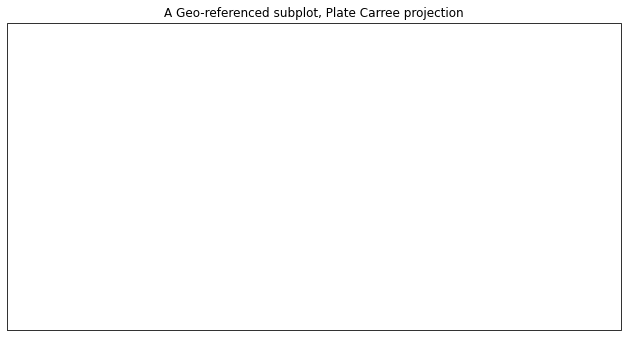

In [2]:
fig = plt.figure(figsize=(11, 8.5))
# Create a GeoAxes that uses the PlateCarree projection
# (basically a global lat-lon map projection, which translates from French to "flat square" in English, where each point is equally spaced in terms of degrees)
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-75))
ax.set_title("A Geo-referenced subplot, Plate Carree projection")
# adding a trailing semicolon to the last line prevents output from the deployed axes method from appearing

### Although the figure seems empty, it has in fact been georeferenced, using one of Cartopy's map projections that is provided by Cartopy's `crs` (coordinate reference system) class. We can now add in cartographic features, in the form of *shapefiles*, to our subplot. One of them is `coastlines`, which is a callable `GeoAxes` method that can be plotted directly on our subplot.

In [3]:
ax.coastlines()

<div class="alert alert-info">When using the `%matplotlib inline` notebook magic, to get the figure to display again with the features that we've added since the original display, just type the name of the Figure object in its own cell.</div>

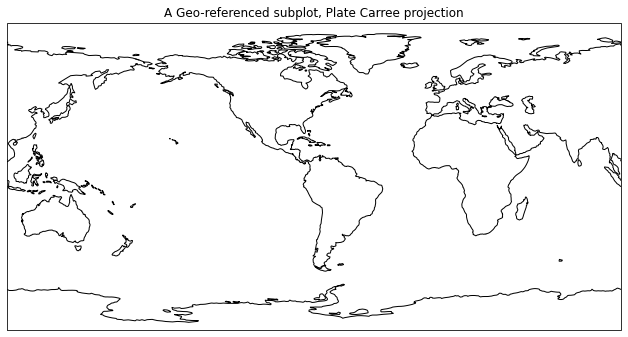

In [4]:
fig

### Cartopy provides other cartographic features via its `features` class, which we've imported as `cfeature`. These are also shapefiles, downloaded on initial request from http://www.naturalearthdata.com/ . Once downloaded, they "live" in your `~/.local/share/cartopy` directory.

#### We add them to our subplot via the `add_feature` method. We can define attributes for them in a manner similar to Matplotlib's `plot` method. A list of the various Natural Earth shapefiles appears in https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html .

In [5]:
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')

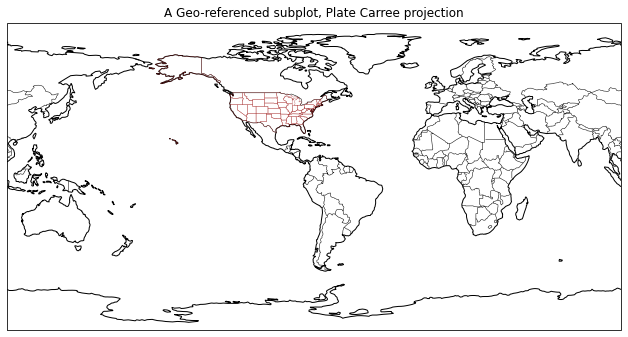

In [6]:
fig

## <span style="color:purple">3) Explore some of Cartopy's map projections</span>

<div class="alert: alert-info"> You can find a list of supported projections in Cartopy, with examples, at <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html">https://scitools.org.uk/cartopy/docs/latest/crs/projections.html</a></div>

### Mollweide Projection (often used with global satellite mosaics)
#### This time, we'll define an object to store our projection definition.

Text(0.5, 1.0, 'Mollweide Projection')

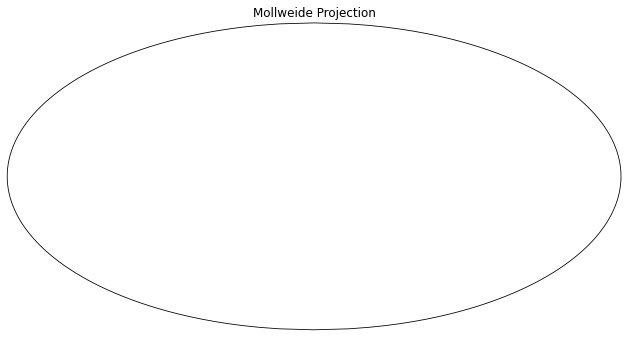

In [7]:
fig = plt.figure(figsize=(11, 8.5))
proj = ccrs.Mollweide(central_longitude=0)
ax = plt.subplot(1, 1, 1, projection=proj)
ax.set_title("Mollweide Projection")

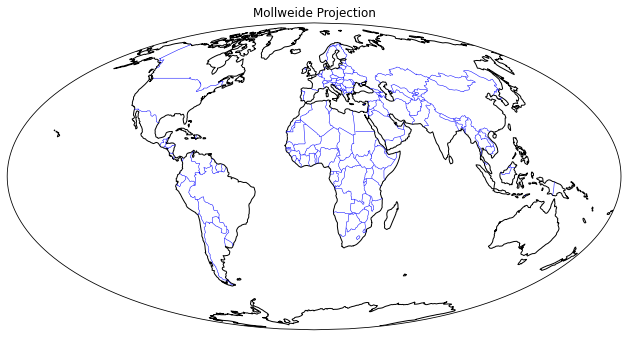

In [8]:
# Add in the cartographic shapefiles
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')
fig

#### Add a fancy background image to the map.

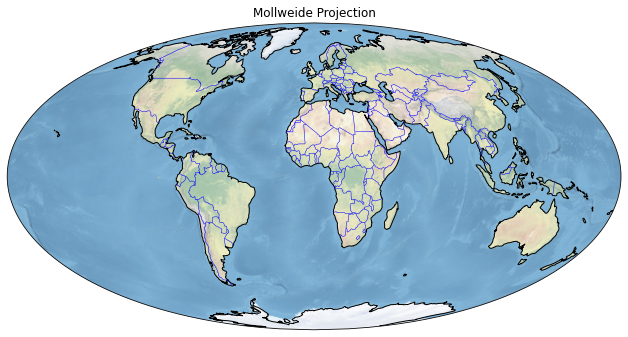

In [9]:
ax.stock_img()
fig

### Lambert Azimuthal Equal Area Projection

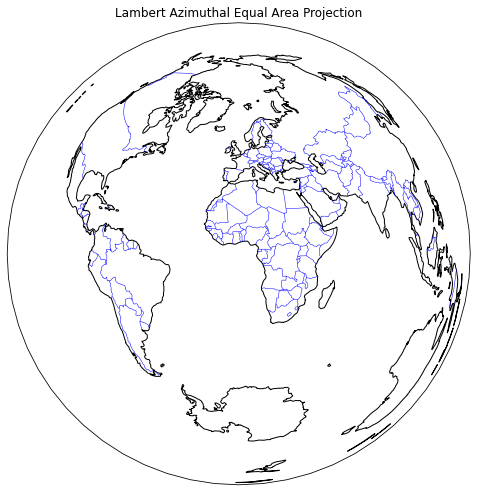

In [10]:
fig = plt.figure(figsize=(11, 8.5))
proj = ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=0.0)
ax = plt.subplot(1, 1, 1, projection=proj)
ax.set_title("Lambert Azimuthal Equal Area Projection")
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')

## <span style="color:purple">4) Create regional maps</span>

### Now, let's go back to PlateCarree, but let's use Cartopy's `set_extent` method to restrict the map coverage to a North American view. Let's also choose a lower resolution for coastlines, just to illustrate how one can specify that. Plot lat/lon lines as well.

### Reference for Natural Earth's three resolutions (10m, 50m, 110m; higher is coarser): http://www.naturalearthdata.com/downloads/ 

In [11]:
proj = ccrs.PlateCarree()
lonW = -140
lonE = -40
latS = 15
latN = 65
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

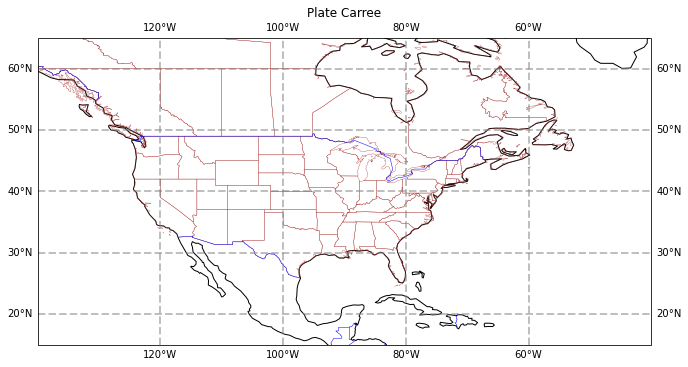

In [12]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=proj)
ax.set_title('Plate Carree')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())
ax.coastlines(resolution=res, color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')

#### Did you notice the output above the map about *cartopy.mpl.feature_artist*? We can eliminate that in one of two ways:
1. Use a generic object name, `_`, to assign that last feature to.
2. Add a semicolon at the end of the last line in the cell.

#### The PlateCarree projection exaggerates the spatial extent of regions closer to the poles. Let's try a couple different projections. 

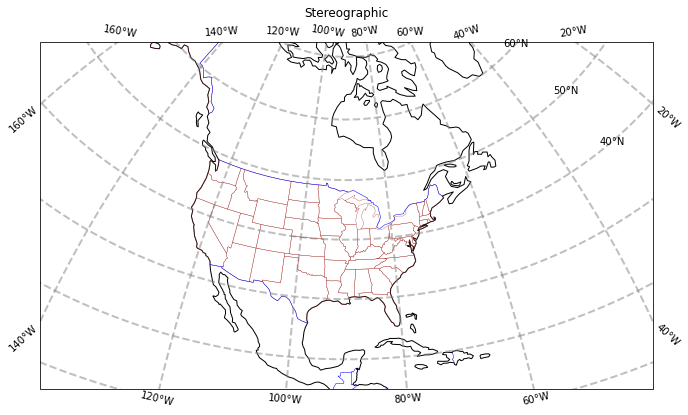

In [13]:
proj = ccrs.Stereographic(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=proj)
ax.set_title('Stereographic')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())
ax.coastlines(resolution=res, color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
# Use generic object name to suppress text output to the screen
_ = ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')

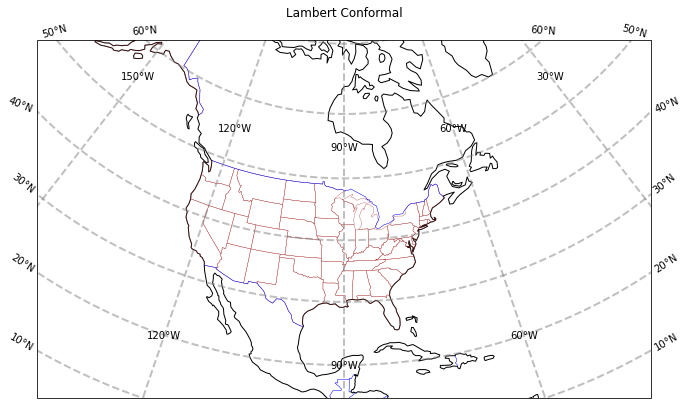

In [14]:
proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=proj)
ax.set_title('Lambert Conformal')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
)
ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())
ax.coastlines(resolution='110m', color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
# End last line with a semicolon to suppress text output to the screen
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

<div class="alert alert-info">Lat/lon labeling for projections other than Mercator and PlateCarree is a recent addition to Cartopy. As you can see, work still needs to be done to improve the placement of labels.</div>

### Create a regional map, centered over New York State and add in some more Natural Earth geographic features.


Set the domain for defining the plot region. We will use this in the `set_extent` line below. Since these coordinates are expressed in degrees, they correspond to the PlateCarree projection.

<div class="alert alert-warning">Be patient: with a limited regional extent as specified here, the highest resolution (10m) shapefiles are used; as a result, this will take some time to plot (could be several minutes), and even longer if you haven't previously retrieved these features from the Natural Earth shapefile server.</div>

In [15]:
latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2

#### Some pre-defined Features exist as `cartopy.feature` constants. The resolution of these pre-defined Features will depend on the areal extent of your map, which you specify via `set_extent`.

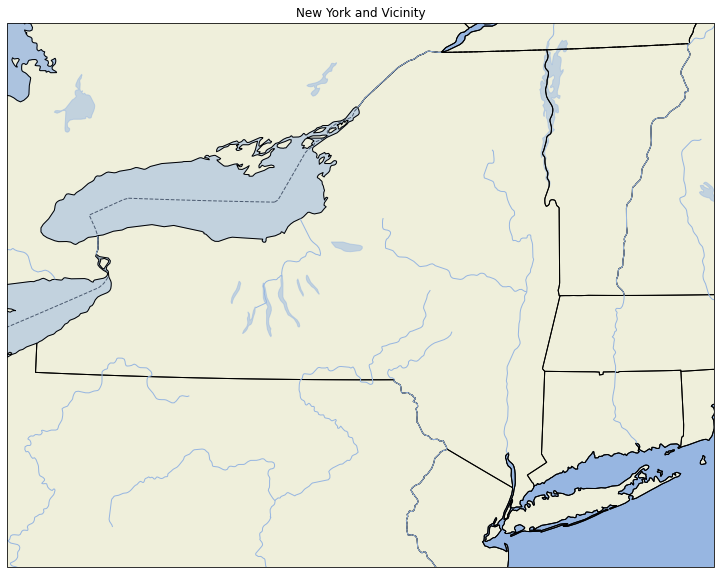

In [16]:
proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=proj)
ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.set_title('New York and Vicinity');

### Let's create a new map, but this time use lower-resolution shapefiles from Natural Earth, and also eliminate plotting the country borders.
### Notice this is a bit more involved. First we create objects for our lower-resolution shapefiles via the `NaturalEarthFeature` method from Cartopy's `feature` class, and then we add them to the map with `add_feature`.

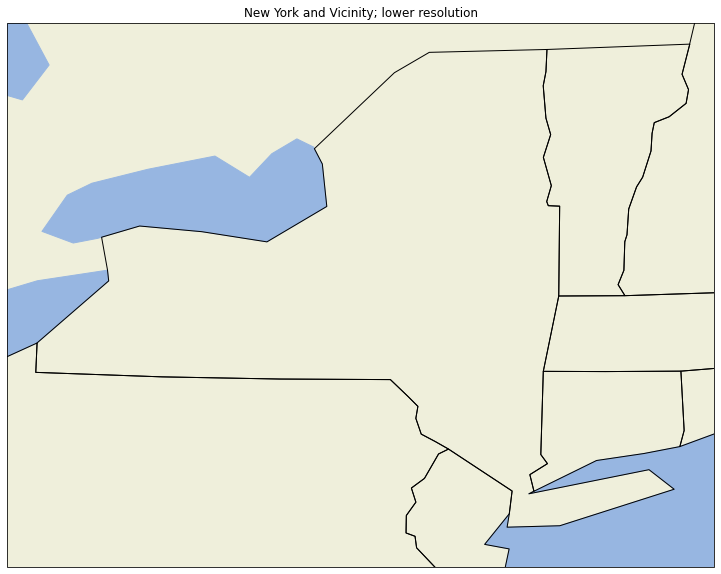

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1, projection=proj)
ax.set_extent((lonW, lonE, latS, latN), crs=ccrs.PlateCarree())

# The features with names such as cfeature.LAND, cfeature.OCEAN, are higher-resolution (10m) shapefiles from the
# Naturalearth repository.  Lower resolution shapefiles (50m, 110m) can be used by using the cfeature.NaturalEarthFeature
# method as illustrated below.

resolution = '110m'

land_mask = cfeature.NaturalEarthFeature(
    'physical',
    'land',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['land'],
)
sea_mask = cfeature.NaturalEarthFeature(
    'physical',
    'ocean',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['water'],
)
lake_mask = cfeature.NaturalEarthFeature(
    'physical',
    'lakes',
    scale=resolution,
    edgecolor='face',
    facecolor=cfeature.COLORS['water'],
)
state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lakes',
    scale=resolution,
    facecolor='none',
)

ax.add_feature(land_mask)
ax.add_feature(sea_mask)
ax.add_feature(lake_mask)
ax.add_feature(state_borders, linestyle='solid', edgecolor='black')
ax.set_title('New York and Vicinity; lower resolution');

### Finally, let's create a figure with two subplots. On one, we'll repeat our hi-res NYS map; on the second, we'll plot over a different part of the world.

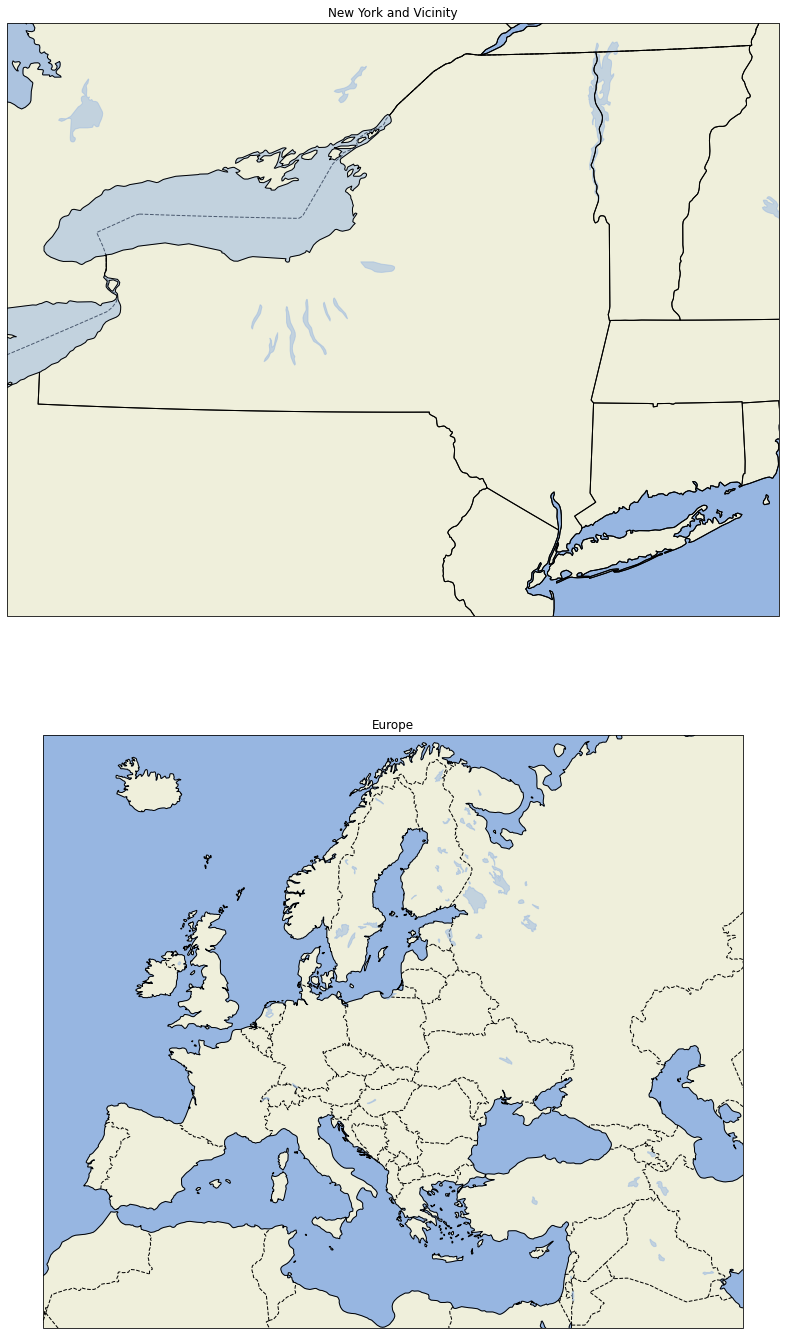

In [18]:
# Create the figure object
fig = plt.figure(
    figsize=(30, 24)
)  # Notice we need a bigger "canvas" so these two maps will be of a decent size

latN = 45.2
latS = 40.2
lonW = -80.0
lonE = -71.5
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# First subplot
ax = plt.subplot(2, 1, 1, projection=proj)
ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES)
ax.set_title('New York and Vicinity')

# Set the domain for defining the second plot region.
latN = 70
latS = 30.2
lonW = -10
lonE = 50
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2

proj = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# Second subplot
ax2 = plt.subplot(2, 1, 2, projection=proj)
ax2.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle='--')
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.add_feature(cfeature.STATES)
ax2.set_title('Europe');